<a href="https://colab.research.google.com/github/Electra89/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[Click here to open Github repo.](https://github.com/Electra89/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering)

# **Problem Statement**


> The problem at hand is to conduct exploratory data analysis on a Netflix dataset in order to understand the types of content available in different countries, determine if Netflix has been prioritizing TV shows over movies in recent years, and cluster similar content based on text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np                                              # Library for efficient numerical operations
import pandas as pd                                             # Library for data manipulation
import matplotlib.pyplot as plt                                 # Library for creating visualizations and plots in Python.
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns                                           # Library for creating visualizations and plots in Python.
import plotly.express as px

### Dataset Loading

In [2]:
# Load Dataset
Dataset_path ="https://raw.githubusercontent.com/Electra89/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv"
df=pd.read_csv(Dataset_path)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Number of Rows: {df.shape[0]} \nNumber of Columns: {df.shape[1]}")

Number of Rows: 7787 
Number of Columns: 12


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"Duplicate Value Counts: {df.duplicated().sum()}")

Duplicate Value Counts: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
null_info = pd.DataFrame({

    'Null_value_Count': df.isna().sum(),
    'Percentage ': round(df.isnull().mean() * 100,2)
})

# Printing the tabular representation
print("-" * 50)
print("Null value count in each of the variable: ")
print("-" * 50)
print(null_info)
print("-" * 50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
              Null_value_Count  Percentage 
show_id                      0         0.00
type                         0         0.00
title                        0         0.00
director                  2389        30.68
cast                       718         9.22
country                    507         6.51
date_added                  10         0.13
release_year                 0         0.00
rating                       7         0.09
duration                     0         0.00
listed_in                    0         0.00
description                  0         0.00
--------------------------------------------------


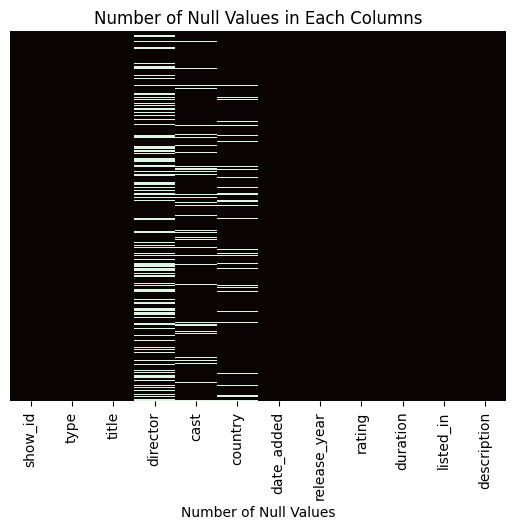

In [8]:
# Visualizing the missing values
null_counts = df.isnull().sum()

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')
plt.title('Number of Null Values in Each Columns')
plt.xlabel('Number of Null Values')
plt.show()

### What did you know about your dataset?

> * The Netflix Movies and TV Shows Clustering dataset comprises information on TV shows and movies available on Netflix as of 2019. With 7787 entries and 12 columns, the dataset includes a mix of categorical and numerical variables.
> * Some variables such as director, cast, country, date added, and rating contain null values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description

In [11]:
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

| Column         |              Description                                                           |
|----------------|-----------------------------------------------------------------------|
| **show_id**    | A unique identifier for each movie or TV show in the dataset.         |
| **type**       | Indicates whether the entry is a movie or a TV show.                   |
| **title**      | The title of the movie or TV show.                                    |
| director       | The name of the director(s) associated with the content.              |
| **cast**       | The names of the main cast members in the movie or TV show.           |
| **country**    | The country or countries where the content was produced or originated.|
| **date_added** | The date when the movie or TV show was added to Netflix.              |
| **release_year**| The year when the movie or TV show was originally released.           |
| **rating**     | The content rating assigned to the movie or TV show (e.g., PG, TV-MA).|
| **duration**   | The duration of the movie or TV show (e.g., "1h 30m" for 1 hour and 30 minutes).|
| **listed_in**  | The categories or genres in which the content is listed.              |
| **description**| A brief summary or description of the movie or TV show.               |


Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
def unique_values(data_frame):
    for column in data_frame.columns:
        unique_values = data_frame[column].nunique()
        print(f"Column '{column}' has  unique value(s): {unique_values}")

# Call the function with your DataFrame
unique_values(df)

Column 'show_id' has  unique value(s): 7787
Column 'type' has  unique value(s): 2
Column 'title' has  unique value(s): 7787
Column 'director' has  unique value(s): 4049
Column 'cast' has  unique value(s): 6831
Column 'country' has  unique value(s): 681
Column 'date_added' has  unique value(s): 1565
Column 'release_year' has  unique value(s): 73
Column 'rating' has  unique value(s): 14
Column 'duration' has  unique value(s): 216
Column 'listed_in' has  unique value(s): 492
Column 'description' has  unique value(s): 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
Dataset_path ="https://raw.githubusercontent.com/Electra89/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv"
df=pd.read_csv(Dataset_path)

In [14]:
# Shape of the dataframe before Data Wrangling
print(f"Dataset size before dropping values : {df.shape}")

Dataset size before dropping values : (7787, 12)


In [15]:
new_df = df.copy()

In [16]:
# Fill missing values for 'director', 'cast', and 'country' columns with 'Unknown'
new_df[['director','cast','country']] = new_df[['director','cast','country']].fillna('Unknown')

In [17]:
# Fill missing values for 'rating' with the mode value
new_df['rating']= new_df['rating'].fillna(new_df['rating'].mode()[0])

In [18]:
# Drop rows with any remaining missing values
new_df.dropna(axis=0, inplace=True)

In [19]:
new_df['duration']=new_df['duration'].apply(lambda x: int(x.split()[0]))    # need to check

In [20]:
# Shape of the dataframe after Data Wrangling
print(f"Dataset size after dropping  : {new_df.shape}")

Dataset size after dropping  : (7777, 12)


## Handling nested columns

In [21]:
temp_df = new_df.copy()

In [22]:
def unnest_column(df, column_name):
    # Split the column and unnest
    unnested_df = df[column_name].apply(lambda x: str(x).split(', ')).tolist()
    df = pd.DataFrame(unnested_df, index=df['title']).stack()

    # Create a DataFrame, reset the index, and set the column names
    df = df.reset_index(level=1, drop=True).reset_index(name=column_name)

    return df

# Applying the function for 'director', 'cast', 'listed_in', and 'country'
dt1 = unnest_column(temp_df, 'director')
dt2 = unnest_column(temp_df, 'cast')
dt3 = unnest_column(temp_df, 'listed_in')
dt4 = unnest_column(temp_df, 'country')


In [23]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [24]:
dfs = (
    dt2.merge(dt1, on='title', how='inner')
       .merge(dt3, on='title', how='inner')
       .merge(dt4, on='title', how='inner')
)

# Merging with the original DataFrame
temp_df = dfs.merge(new_df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'description']],
              on='title', how='left')


In [25]:
temp_df.head()

,title,cast,director,listed_in,country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...


In [26]:
# Typecasting string object to datetime object of date_added column
new_df['date_added']= pd.to_datetime(new_df['date_added'])

# Extracting date, day, month and year from date_added column
new_df["day_added"]= new_df["date_added"].dt.day
new_df["month_added"]= new_df["date_added"].dt.month
new_df["year_added"]= new_df["date_added"].dt.year

# Dropping date_added
new_df.drop('date_added', axis=1, inplace=True)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   int64 
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  day_added     7777 non-null   int64 
 12  month_added   7777 non-null   int64 
 13  year_added    7777 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 911.4+ KB


## Remaping ratings column  


* **Adult Content** : TV-MA, NC-17, R
* **Children Content** : TV-PG, PG, TV-G, G
* **Teen Content** : PG-13, TV-14
* **Family-friendly Content** : TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated** : NR, UR


In [28]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

new_df['rating'].replace(rating_map, inplace = True)
new_df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   int64 
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  day_added     7777 non-null   int64 
 12  month_added   7777 non-null   int64 
 13  year_added    7777 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 911.4+ KB


### What all manipulations have you done and insights you found?

> * Null values in the **'director'**, **'cast'**, and **'country'** columns have been filled with the string 'Unknown' using the fillna method.
> * Null values in the **'rating'** column have been filled with the mode (most frequent value) of the column using the fillna method. Note that for **'rating'**, the inplace=True parameter has been used.
> * The **'date_added'** column has been converted to datetime format using the pd.to_datetime method.
 * We have also extracted the following features:
   *  'date' from 'date_added'.
   *  'month' from 'date_added'.
   *  'year' from 'date_added'.
> * Rows containing any remaining missing values after the above manipulations have been dropped using the dropna method
> * We have seen that the 'rating' column contains various coded categories, so we have decided to create 5 bins and distribute the values accordingly:
  * **Adult** : TV-MA, NC-17
  * **Restricted** : R, UR
  * **Teen** : PG-13, TV-14
  * **All Ages** : TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  count of Movies vs TV Shows on Netflix.

<ipython-input-30-e529f175d866>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  type_countplot = sns.countplot(data = new_df, x='type', palette='hot_r')


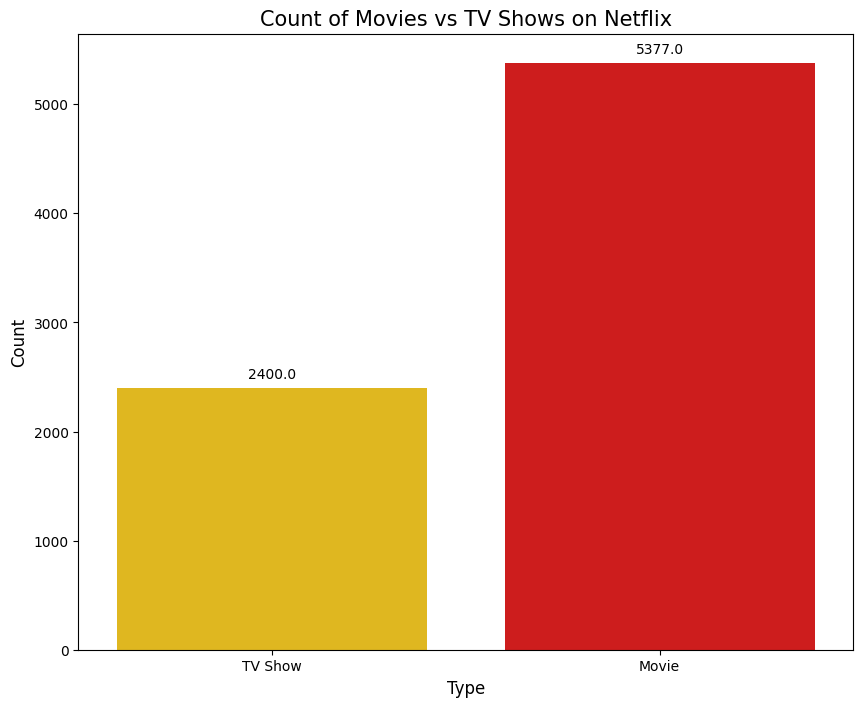

In [30]:
# count of Movies vs TV Shows on Netflix.


# Creating the countplot to visualize the data
plt.figure(figsize = (10,8))

type_countplot = sns.countplot(data = new_df, x='type', palette='hot_r')

# Adding  a title to the plot
plt.title('Count of Movies vs TV Shows on Netflix', fontsize=15, color='black')

# Adding count annotations on top of the bars
for p in type_countplot.patches:
    type_countplot.annotate(f'{p.get_height()}',
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10),
                                textcoords='offset points', fontsize=10, color='black')

# Adding labels for the x and y axes
plt.xlabel('Type', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> The countplot was chosen to visualize the distribution of movie and TV show types in the Netflix dataset due to its suitability for representing categorical data, enabling straightforward comparison of counts, and its simplicity, which facilitates clear communication of the distribution.

##### 2. What is/are the insight(s) found from the chart?

> The chart shows there are more movies (5377) than TV shows (2400) in the Netflix dataset. Basically, Netflix has a lot more movies than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Positive Impact**: Insights guide smart content decisions, optimizing Netflix's content strategy and tailoring user experiences for increased engagement.
> * **Negative Impact**: Imbalances in content types may lead to dissatisfaction, highlighting the importance of diversification. Missing trend opportunities can result in a competitive disadvantage.

#### Chart - 2 distribution of release years of Netflix shows.

In [31]:
# Distribution of release years of Netflix shows.

# Creating the histogram with Plotly
release_year_hist = px.histogram(new_df, x='release_year', nbins=30, title='Distribution of Release Years of Netflix Shows',
                                 labels={'release_year': 'Release Year'}, color_discrete_sequence=['red'],width=800, height=600,text_auto=True)

# Updating layout
release_year_hist.update_layout(
    # Adding  a title to the plot
    title=dict(text='Distribution of Release Years of Netflix Shows', x=0.5, y=0.95, xanchor='center', yanchor='top'),
    # Adding labels for the x and y axes
    xaxis=dict(title='Release Year', showgrid=True,title_font=dict(size=18)),
    yaxis=dict(title='Count', showgrid=True,title_font=dict(size=18)),
    showlegend=False
)

# Displaying the plot
release_year_hist.show()

##### 1. Why did you pick the specific chart?

> A histplot was chosen to show how many Netflix shows were released each year. It helps easily see trends, peaks, and gaps in the release history over the years, giving a clear picture of Netflix's content distribution.

##### 2. What is/are the insight(s) found from the chart?

> * The chart highlights a spike in Netflix content production in 2015-2019, showcasing a recent emphasis on new releases.
> * The distribution of content releases over time can reveal growth trends in Netflix's library. The chart shows an increasing trend in content releases over the years, it suggests that Netflix has been expanding its content library consistently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> the histogram of Netflix shows' release years can contribute to a positive business impact. Knowing when Netflix shows were released helps Netflix plan better. They can focus on the popular years, offer a variety of shows, and make decisions that match what viewers like. This can make users happier and more engaged with Netflix.

#### Chart - 3

In [32]:

# Creating a pie chart with Plotly
fig = px.pie(new_df['country'].value_counts().head(),
             labels=new_df['country'].value_counts().head().index,
             values=new_df['country'].value_counts().head().values,
             title='Top 5 Countries in Netflix Shows',
             names=new_df['country'].value_counts().head().index,
             color_discrete_sequence=px.colors.qualitative.Set1,width=800, height=600)

# Adding interactivity to the chart
fig.update_layout(title=dict( x=0.5, y=0.95, xanchor='center', yanchor='top'))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(legend_title='Country')

# Displaying the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



##### 1. Why did you pick the specific chart?

> This interactive pie chart allows to explore the distribution of shows among the top 5 countries with the highest number of shows. and can hover over the slices to see the country name, count, and percentage, providing a clear visualization of the relative proportions of shows in each country.

##### 2. What is/are the insight(s) found from the chart?

> * The largest slice indicates that the United States has the highest number of shows, highlighting its significant contribution to Netflix's content library.
> * Understanding the geographical distribution helps Netflix strategize content acquisition and production efforts to cater to diverse viewer preferences across different regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Strategic Decision-making**: Insights on dominant countries guide content strategies, enhancing viewer satisfaction and potential for increased viewership.
> * **Competitor Analysis**: Assessing market share relative to other countries aids in understanding the competitive landscape, supporting strategic positioning.


#### Chart - 4 Top 10 countries with the most Netflix shows

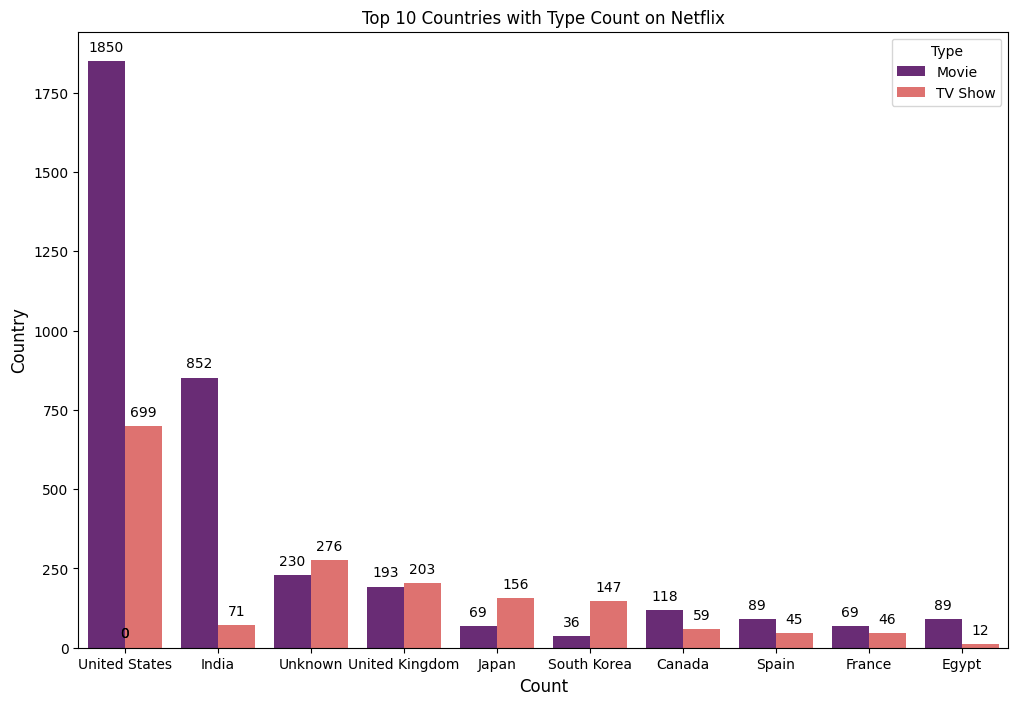

In [33]:

# Create a DataFrame with the top 10 countries
top_countries = new_df['country'].value_counts().head(10).index

# Filter data for the top 10 countries
top_countries_data = new_df[new_df['country'].isin(top_countries)]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='country', hue='type', order=top_countries, data=top_countries_data, palette='magma')

# Add count annotations on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10),
                 textcoords='offset points', fontsize=10, color='black')

# Adding a title to the plot
plt.title('Top 10 Countries with Type Count on Netflix')
# Adding labels for the x and y axes

plt.xlabel('Count', fontsize=12, color='black')
plt.ylabel('Country', fontsize=12, color='black')
plt.legend(title='Type', loc='upper right')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> The countplot  is chosen for this task because it effectively visualizes the frequency count of each category (countries) on the x-axis and the count on the y-axis. This makes it easy to compare the distribution of movie and TV show counts across different countries in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

> * The **United States** is a major contributor to Netflix, leading in both movies (1850) and TV shows (705), underscoring its significant influence on the platform's content.
> * **India** stands out with a substantial movie count (852), but there's room for growth in TV shows (71), indicating a strong presence in movies.
> * The **United Kingdom** maintains a balanced content output with comparable counts in both movies (193) and TV shows (204), reflecting a diverse content landscape.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Targeted Investment**: Insights guide strategic content investments, tailoring production to the influential U.S. market and recognizing growth potential in India.
> * **Market expansion**: Identifying countries with a higher count of movies and TV shows can provide insights into potential markets for expansion. Netflix can prioritize expanding its presence in countries where there is already a substantial demand for their content.

#### Chart - 5 Distribution of Content Ratings on Netflix

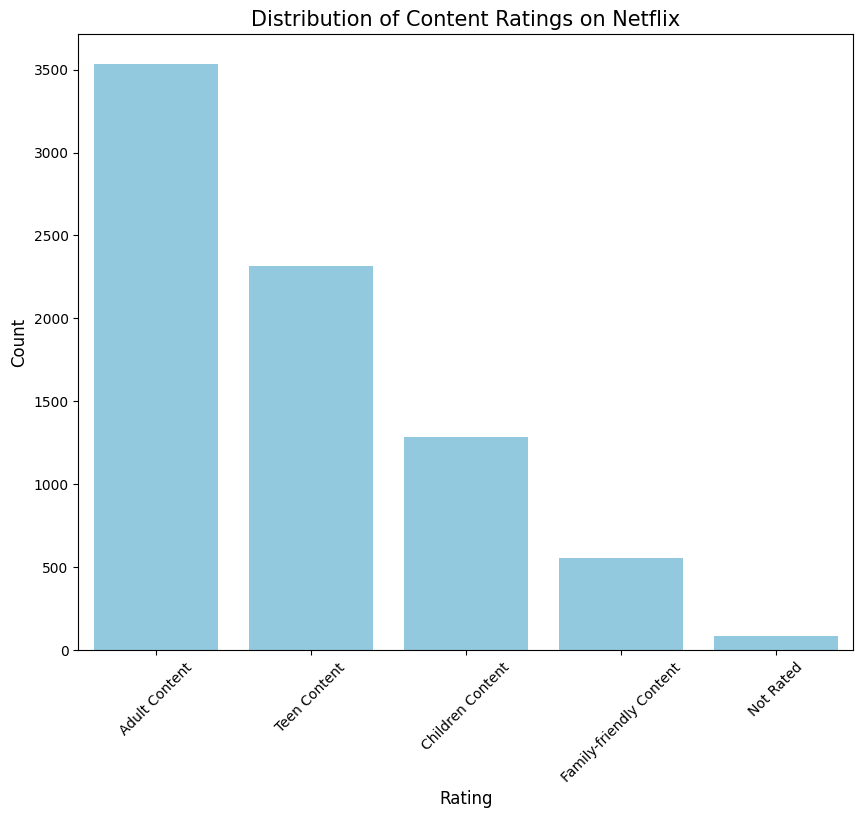

In [35]:
# Distribution of Content Ratings on Netflix

# Creating the countplot to visualize the data
plt.figure(figsize=(10, 8))

rating_countplot = sns.countplot(data=new_df, x='rating', order=new_df['rating'].value_counts().index, color='skyblue')

# Adding a title to the plot
plt.title('Distribution of Content Ratings on Netflix', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Rating', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> The countplot is a suitable choice for visualizing the distribution to show how content ratings are distributed on Netflix. It's a good pick because it displays different ratings on the x-axis and shows how many times each rating appears on the y-axis. This makes it easy to see which ratings are more common and gives a quick overview of Netflix's content.

##### 2. What is/are the insight(s) found from the chart?

> * TV-MA and TV-14 ratings have the highest counts, indicating a significant presence of content suitable for mature audiences.
> * Netflix offers content across a range of ratings, including TV-PG, R, PG-13, TV-Y, TV-Y7, and others, showcasing a diverse content library catering to various audience preferences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Viewer Segmentation**: Knowledge of specific ratings' popularity helps in better understanding viewer segments. This segmentation can be leveraged for personalized recommendations and targeted marketing campaigns, improving user engagement.
> * **Content Diversification**: Recognizing the diversity in ratings allows Netflix to continue offering a wide range of content suitable for different audiences. This diversification can attract a broader user base and enhance customer satisfaction.

#### Chart - 6

In [36]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [37]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [38]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [39]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [40]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [41]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [42]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [43]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [44]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [45]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [49]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [50]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [51]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [52]:
# Expand Contraction

#### 2. Lower Casing

In [53]:
# Lower Casing

#### 3. Removing Punctuations

In [54]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [55]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [56]:
# Remove Stopwords

In [57]:
# Remove White spaces

#### 6. Rephrase Text

In [58]:
# Rephrase Text

#### 7. Tokenization

In [59]:
# Tokenization

#### 8. Text Normalization

In [60]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [61]:
# POS Taging

#### 10. Text Vectorization

In [62]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [63]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [64]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [65]:
# Transform Your data

### 6. Data Scaling

In [66]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [67]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [68]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [69]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [70]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [75]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [76]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [78]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [79]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***